In [1]:
import requests 
from bs4 import BeautifulSoup #Need to install
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time

from datetime import datetime

In [2]:
#Select the object from which you want to scrape data 
url = 'https://pvoutput.org/intraday.jsp?id=39728&sid=36294'

################### Insert your loging and password here ###################
payload = {'login': 'adilet_b11', 'password': 'Shadow1997'}

###########################################################################


requests.post(url, data=payload)
#Make sure corresponding data exists for this date range 
dates = pd.date_range(start='03/24/2020', end='03/26/2020') 
#dates = pd.date_range(start='1/1/2020', end='4/5/2020') 

In [3]:
#Initialize dataframe to keep records
col_names = ["Datetime", "Energy", "Power"]
df = pd.DataFrame(columns=col_names)


with requests.Session() as s:
    p = s.post("https://pvoutput.org", data=payload)

    
    for i in range(len(dates)):

        #Create a string for a date: '2019-01-01' to '20190101'
        a_date = str(dates[i]).replace("-","")[:8] 

        #Create a url for that specific date
        url_of_date = url + '&dt=' + a_date 

        #Scrape data from url
        
        response= s.get(url_of_date)
        soup = BeautifulSoup(response.content, "html.parser")
        time.sleep(30)
        
        #Extract text from url
        data = soup.text
        
        
        #Extract time and cleanup
        time_scraped = []
        time_pattern = re.compile('var cats = \[(.*?)\]')
        check_if_exists = time_pattern.findall(soup.text)
        if len(check_if_exists) > 0:
            time_temp = np.array(time_pattern.findall(soup.text)[0].split("','"))
            time_temp[0] = time_temp[0].replace("'", '')
            time_temp[-1] = time_temp[-1].replace("'", '')
            for i in range(len(time_temp)):
                x = a_date + ' ' + time_temp[i]
                time_scraped.append(datetime.strptime(x, '%Y%m%d %I:%M%p'))
            

            #Extract energy and cleanup
            energyOut_pattern = re.compile('var dataEnergyOut = \[(.*?)\]')
            energyOut = np.array(energyOut_pattern.findall(soup.text)[0].split(","))
            
            

            #Extract power and cleanup
            powerOut_pattern = re.compile('var dataPowerOut = \[(.*?)\]')
            powerOut = np.array(powerOut_pattern.findall(soup.text)[0].split(","))
            

            time_scraped = np.array(time_scraped).reshape((len(time_scraped),1))
            energyOut = energyOut.reshape((len(energyOut), 1))
            powerOut = powerOut.reshape((len(powerOut), 1))
            temp_df = pd.DataFrame(np.hstack((time_scraped, energyOut, powerOut)), columns=col_names)
            df = df.append(temp_df)

In [4]:
df = df.replace("null","0")
df["Energy"] = pd.to_numeric(df["Energy"])
df["Power"] = pd.to_numeric(df["Power"])

In [5]:
df["Date"] = df["Datetime"].dt.date
df["Hour"] = df["Datetime"].dt.hour
df["Min"] =df["Datetime"].dt.minute

In [6]:
df

,Datetime,Energy,Power,Date,Hour,Min
0,2019-10-29 07:45:00,0.000,24,2019-10-29,7,45
1,2019-10-29 07:50:00,0.005,67,2019-10-29,7,50
2,2019-10-29 07:55:00,0.011,90,2019-10-29,7,55
3,2019-10-29 08:00:00,0.021,149,2019-10-29,8,0
4,2019-10-29 08:05:00,0.034,160,2019-10-29,8,5
...,...,...,...,...,...,...
192,2020-02-28 23:35:00,55.014,0,2020-02-28,23,35
193,2020-02-28 23:40:00,55.014,0,2020-02-28,23,40
194,2020-02-28 23:45:00,55.014,0,2020-02-28,23,45
195,2020-02-28 23:50:00,55.014,0,2020-02-28,23,50


In [7]:
df[(df["Hour"] == 14) & (df["Min"] == 5)][:25]

,Datetime,Energy,Power,Date,Hour,Min
73,2019-10-29 14:05:00,4.642,873,2019-10-29,14,5
80,2019-10-30 14:05:00,7.787,1157,2019-10-30,14,5
82,2019-10-31 14:05:00,14.486,2250,2019-10-31,14,5
80,2019-11-01 14:05:00,9.162,1782,2019-11-01,14,5
81,2019-11-03 14:05:00,9.143,986,2019-11-03,14,5
82,2019-11-04 14:05:00,23.498,849,2019-11-04,14,5
74,2019-11-05 14:05:00,4.477,753,2019-11-05,14,5
80,2019-11-06 14:05:00,11.794,5217,2019-11-06,14,5
81,2019-11-07 14:05:00,30.665,1698,2019-11-07,14,5
74,2019-11-08 14:05:00,3.877,665,2019-11-08,14,5


C:\Users\User1\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


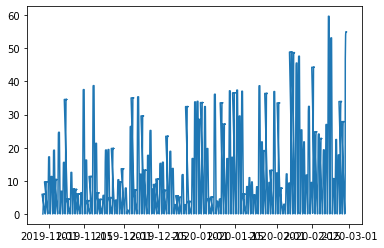

In [8]:
plt.plot(df["Datetime"], df["Energy"])

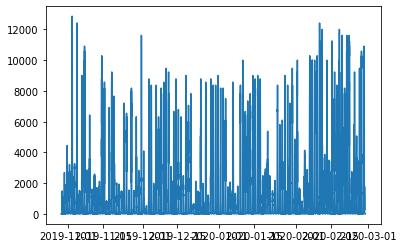

In [9]:
plt.plot(df["Datetime"], df["Power"])

In [10]:
df.to_excel("to_feb.xlsx",
             sheet_name='Sheet_name_1')  